In [1]:
import numpy as np
from src.utils.data_helper import load_eegbci_data, create_epochs_from_raw

In [2]:
subjects = list(range(1, 3))
runs = [6, 10, 14]
raw = load_eegbci_data(subjects, runs)

Extracting EDF parameters from C:\Users\erik\IES_codebase\pythonProjects\EEG_Exoskeleton\data\raw_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\erik\IES_codebase\pythonProjects\EEG_Exoskeleton\data\raw_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\erik\IES_codebase\pythonProjects\EEG_Exoskeleton\data\raw_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\erik\IES_codebase\pythonProjects\EEG_Exoskeleton\data\raw_data\

In [3]:
event_id = dict(hands=2, feet=3)
epochs = create_epochs_from_raw(raw, tmin=-1, tmax=4, event_id=event_id, baseline=None)

Used Annotations descriptions: ['T0', 'feet', 'hands']
Ignoring annotation durations and creating fixed-duration epochs around annotation onsets.
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 90 events and 801 original time points ...
0 bad epochs dropped


In [4]:
from src.utils.data_helper import seperate_brain_waves

brain_wave_epochs = seperate_brain_waves(epochs)

In [5]:
brain_wave_epochs

{'Delta': <Epochs | 90 events (all good), -1 – 4 s (baseline off), ~35.3 MB, data loaded,
  'hands': 45
  'feet': 45>,
 'Theta': <Epochs | 90 events (all good), -1 – 4 s (baseline off), ~35.3 MB, data loaded,
  'hands': 45
  'feet': 45>,
 'Alpha': <Epochs | 90 events (all good), -1 – 4 s (baseline off), ~35.3 MB, data loaded,
  'hands': 45
  'feet': 45>,
 'Beta': <Epochs | 90 events (all good), -1 – 4 s (baseline off), ~35.3 MB, data loaded,
  'hands': 45
  'feet': 45>}

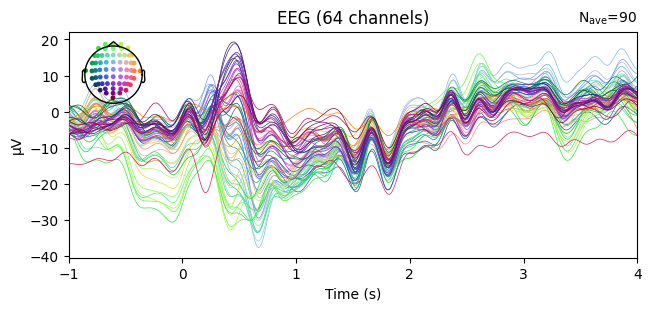

Text(0.5, 1.0, 'Delta Band (0-4 Hz)')

In [6]:
# Delta
delta_epochs = brain_wave_epochs["Delta"]
delta_evoked = delta_epochs.average()
fig_delta = delta_evoked.plot()
fig_delta.axes[0].set_title("Delta Band (0-4 Hz)")

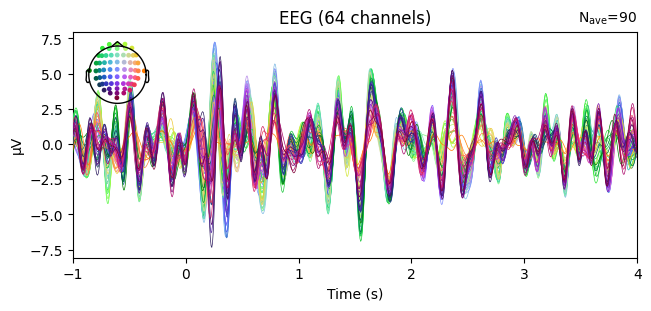

Text(0.5, 1.0, 'Theta Band (4-8 Hz)')

In [7]:
# Theta
theta_epochs = brain_wave_epochs["Theta"]
theta_evoked = theta_epochs.average()
fig_theta = theta_evoked.plot()
fig_theta.axes[0].set_title("Theta Band (4-8 Hz)")

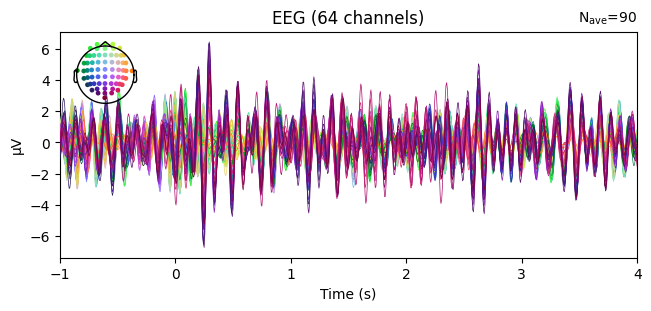

Text(0.5, 1.0, 'Alpha Band (8-12 Hz)')

In [8]:
# Alpha
alpha_epochs = brain_wave_epochs["Alpha"]
alpha_evoked = alpha_epochs.average()
fig_alpha = alpha_evoked.plot()
fig_alpha.axes[0].set_title("Alpha Band (8-12 Hz)")

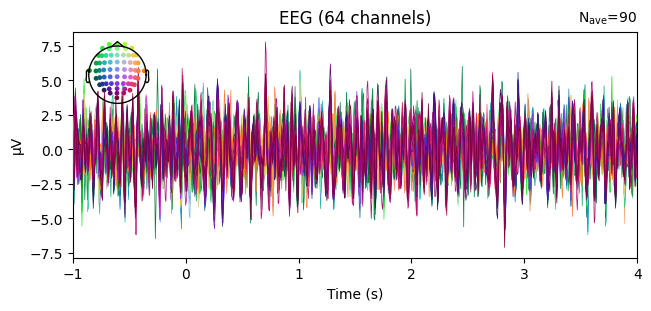

Text(0.5, 1.0, 'Beta Band (12-40 Hz)')

In [9]:
# Beta
beta_epochs = brain_wave_epochs["Beta"]
beta_evoked = beta_epochs.average()
fig_beta = beta_evoked.plot()
fig_beta.axes[0].set_title("Beta Band (12-40 Hz)")

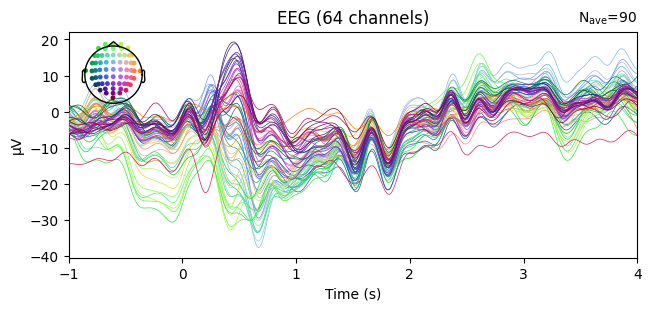

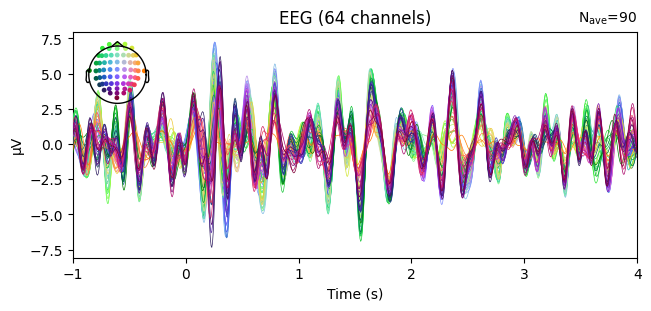

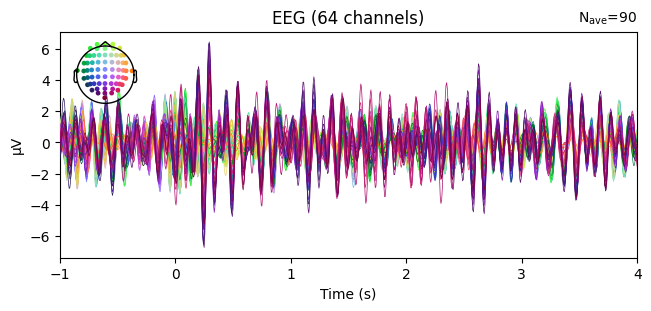

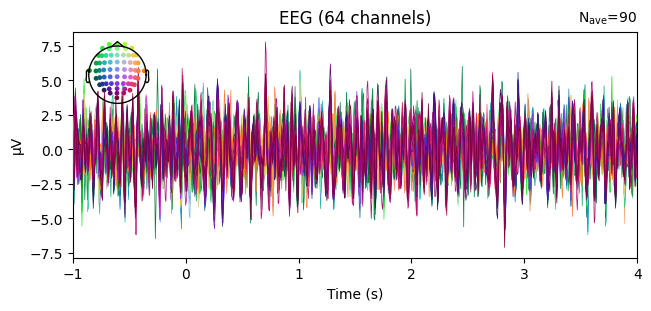

In [10]:
from src.utils.viz_helper import plot_brain_wave

plot_brain_wave(brain_wave_epochs, "all", title="All brain waves")